In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!pip install scikit-learn


In [4]:
!pip install lightgbm


[LightGBM] [Info] Number of positive: 235177, number of negative: 235218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 470395, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499956 -> initscore=-0.000174
[LightGBM] [Info] Start training from score -0.000174
✅ LightGBM Model Accuracy: 0.9322

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     58779
           1       0.96      0.90      0.93     58820

    accuracy                           0.93    117599
   macro avg       0.93      0.93      0.93    117599
weighted avg       0.93      0.93      0.93    117599



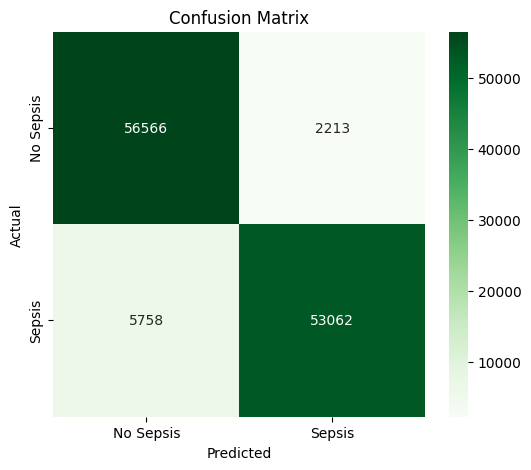

✅ LightGBM Model saved as: lightgbm_sepsis_model.pkl


In [6]:
import pandas as pd
import lightgbm as lgb
import joblib  # To save the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
df = pd.read_csv(file_path)

# Fix column names (remove special characters)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

# Step 1: Separate features and target
X = df.drop(columns=["SepsisLabel"])  # Features
y = df["SepsisLabel"]  # Target

# Step 1.5: Drop non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("⚠ Non-numeric columns detected and will be dropped:", non_numeric_cols.tolist())
    X = X.drop(columns=non_numeric_cols)

# Step 2: Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the LightGBM model
lgb_model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = lgb_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ LightGBM Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Save the trained model
model_path = "lightgbm_sepsis_model.pkl"
joblib.dump(lgb_model, model_path)
print(f"✅ LightGBM Model saved as: {model_path}")

📦 Loaded LightGBM model from: /content/lightgbm_sepsis_model.pkl
🧪 Test Accuracy: 0.9322

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     58779
           1       0.96      0.90      0.93     58820

    accuracy                           0.93    117599
   macro avg       0.93      0.93      0.93    117599
weighted avg       0.93      0.93      0.93    117599



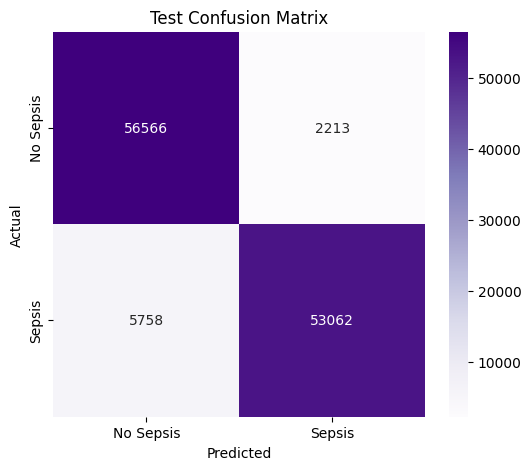

In [7]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model_path = "/content/lightgbm_sepsis_model.pkl"
lgb_model = joblib.load(model_path)
print(f"📦 Loaded LightGBM model from: {model_path}")

# Step 2: Load and preprocess the test dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

X = df.drop(columns=["SepsisLabel"])
y = df["SepsisLabel"]

# Drop non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("⚠ Non-numeric columns detected and will be dropped:", non_numeric_cols.tolist())
    X = X.drop(columns=non_numeric_cols)

# (Optional) Use only a holdout set if not already split earlier
from sklearn.model_selection import train_test_split
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Make predictions
y_pred = lgb_model.predict(X_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"🧪 Test Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

✅ Model Accuracy: 0.6036

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61     58779
           1       0.61      0.59      0.60     58820

    accuracy                           0.60    117599
   macro avg       0.60      0.60      0.60    117599
weighted avg       0.60      0.60      0.60    117599



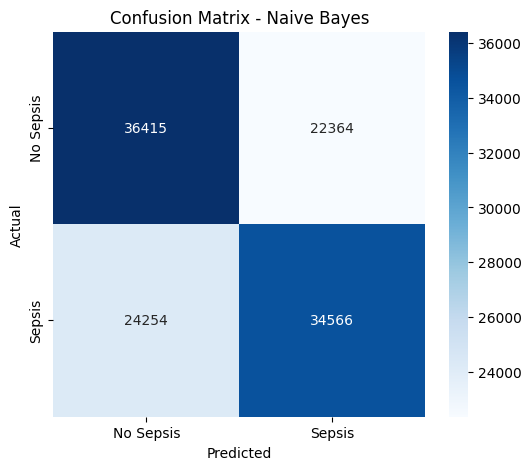

✅ Model saved as: naive_bayes_sepsis_model.pkl


In [12]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
df = pd.read_csv(file_path)

# Step 1: Separate features and target
X = df.drop(columns=["SepsisLabel"])
y = df["SepsisLabel"]

# Step 2: Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = nb_model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Step 7: Save the trained model
model_path = "naive_bayes_sepsis_model.pkl"
joblib.dump(nb_model, model_path)
print(f"✅ Model saved as: {model_path}")

✅ Test Accuracy: 0.6022

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.62      0.61    293997
           1       0.61      0.59      0.60    293997

    accuracy                           0.60    587994
   macro avg       0.60      0.60      0.60    587994
weighted avg       0.60      0.60      0.60    587994



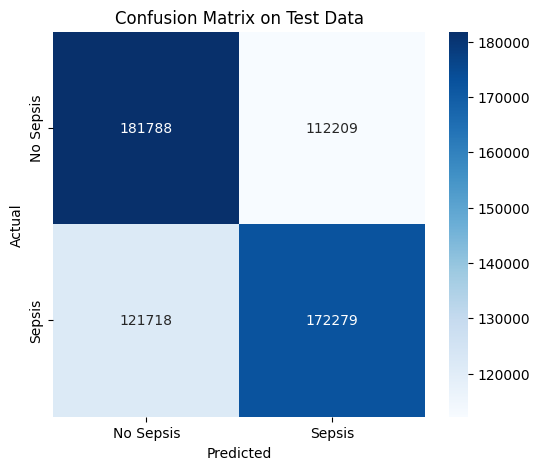

📁 Predictions saved to: test_results_with_predictions.csv


In [13]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model_path = "/content/naive_bayes_sepsis_model.pkl"
nb_model = joblib.load(model_path)

# Step 2: Load your test data
# Replace this with the path to your actual test dataset
test_file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"
test_df = pd.read_csv(test_file_path)

# Step 3: Check if 'SepsisLabel' exists for evaluation
if "SepsisLabel" in test_df.columns:
    X_test = test_df.drop(columns=["SepsisLabel"])
    y_true = test_df["SepsisLabel"]

    # Step 4: Make predictions
    y_pred = nb_model.predict(X_test)

    # Step 5: Evaluate model performance
    accuracy = accuracy_score(y_true, y_pred)
    print(f"✅ Test Accuracy: {accuracy:.4f}\n")
    print("📌 Classification Report:\n", classification_report(y_true, y_pred))

    # Step 6: Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix on Test Data")
    plt.show()

    # Optional: Save predictions
    test_df["SepsisPrediction"] = y_pred
    test_df.to_csv("test_results_with_predictions.csv", index=False)
    print("📁 Predictions saved to: test_results_with_predictions.csv")

else:
    # If no labels, just run prediction
    predictions = nb_model.predict(test_df)
    test_df["SepsisPrediction"] = predictions
    test_df.to_csv("test_results_with_predictions.csv", index=False)
    print("✅ Predictions made and saved to test_results_with_predictions.csv")

✅ Decision Tree Accuracy: 0.9676

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     58779
           1       0.97      0.97      0.97     58820

    accuracy                           0.97    117599
   macro avg       0.97      0.97      0.97    117599
weighted avg       0.97      0.97      0.97    117599



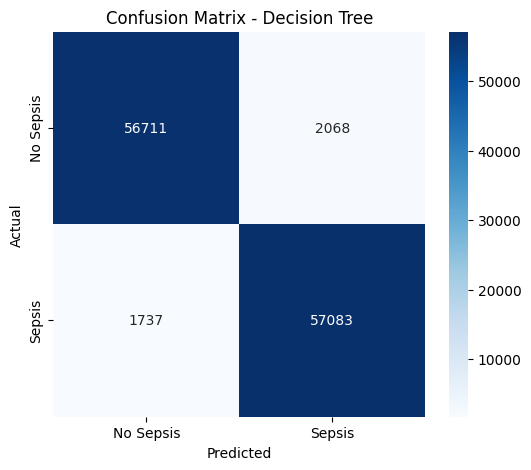

✅ Model saved to: decision_tree_sepsis_model.pkl


In [14]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"  # Replace with your file if needed
df = pd.read_csv(file_path)

# Step 2: Split features and labels
X = df.drop(columns=["SepsisLabel"])
y = df["SepsisLabel"]

# Step 3: Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Decision Tree Accuracy: {accuracy:.4f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Sepsis", "Sepsis"], yticklabels=["No Sepsis", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Step 8: Save the model
model_path = "decision_tree_sepsis_model.pkl"
joblib.dump(dt_model, model_path)
print(f"✅ Model saved to: {model_path}")


✅ Decision Tree Model Evaluation on Test Set:
Accuracy: 0.9920

📌 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    293997
           1       0.99      0.99      0.99    293997

    accuracy                           0.99    587994
   macro avg       0.99      0.99      0.99    587994
weighted avg       0.99      0.99      0.99    587994



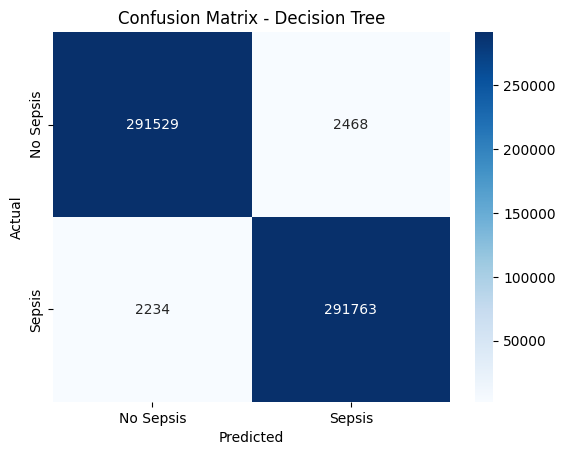


✅ Test results with predictions saved to: decision_tree_test_evaluation_results.csv


In [15]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the trained model
model_path = "/content/decision_tree_sepsis_model.pkl"
dt_model = joblib.load(model_path)

# Step 2: Load your test dataset
test_file_path = "/content/drive/MyDrive/cleaned_sepsis_data.csv"  # ⛳ Replace this with your actual test file name
df_test = pd.read_csv(test_file_path)

# Check if SepsisLabel exists (for evaluation)
if "SepsisLabel" in df_test.columns:
    # Step 3A: Use true labels to evaluate
    X_test = df_test.drop(columns=["SepsisLabel"])
    y_true = df_test["SepsisLabel"]

    # Predict
    y_pred = dt_model.predict(X_test)

    # Evaluation
    print("\n✅ Decision Tree Model Evaluation on Test Set:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\n📌 Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Sepsis", "Sepsis"],
                yticklabels=["No Sepsis", "Sepsis"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Decision Tree")
    plt.show()

    # Save predictions
    df_test["PredictedLabel"] = y_pred
    df_test.to_csv("decision_tree_test_evaluation_results.csv", index=False)
    print("\n✅ Test results with predictions saved to: decision_tree_test_evaluation_results.csv")

else:
    # Step 3B: If no labels are provided, just predict
    print("⚠ No 'SepsisLabel' column found. Running predictions only.")
    predictions = dt_model.predict(df_test)

    # Save predictions
    df_test["PredictedLabel"] = predictions
    df_test.to_csv("decision_tree_test_predictions_only.csv", index=False)
    print("✅ Predictions saved to: decision_tree_test_predictions_only.csv")